# **Mục lục:**
## Phần 1: Giới thiệu
- **1.1 Bối cảnh và mục đích**
- **1.2 Giới thiệu về bộ dữ liệu**
## Phần 2: Khám phá tập dữ liệu
- **2.1 Tổng quan tập dữ liệu**
- **2.2 Tổng hợp thông tin khách hàng**
- **2.3 Xử lí và làm sạch dữ liệu**
- **2.4 Phân tích mô tả đơn biến**
## Phần 3: Mô hình hóa dữ liệu
- **3.1 Chuẩn hóa dữ liệu**
- **3.2 PCA**
- **3.3 Đánh giá và chọn chỉ số cho mô hình**
- **3.4 Huấn luyện mô hình**
- **3.5 Trực quan hóa kết quả**
- **3.6 Phân tích đặc điểm từng nhóm**

## Phần 4: Kết luận
- **4.1 Tóm tắt phát hiện**
- **4.2 Chiến lược phát triển**

------------------------------------------------------------------------------

# Phần 1: Giới thiệu

##1.1 Bối cảnh và mục đích:

Bạn được tuyển dụng vào một chuỗi khách sạn cao cấp để phân tích hiệu suất kinh doanh dựa trên dữ liệu đặt phòng từ tháng 3 năm 2023 đến đầu tháng 2 năm 2025. Ban quản lý khách sạn đang đối mặt với nhiều vấn đề kinh doanh và họ cần bạn tìm ra insights quan trọng của từng nhóm khách hàng để cải thiện trải nghiệm khách hàng và tối ưu doanh thu.

##1.2 Giới thiệu về bộ dữ liệu:

Bộ dữ liệu mô phỏng hệ thống đặt phòng của khách sạn gồm 6 bảng dữ liệu quan trọng.

|Tên bảng| Mô tả |
|--------|-------|
|Customers|Danh sách khách hàng|
|Rooms|Thông tin các phòng trong khách sạn|
|Bookings|Lịch sử đặt phòng của khách hàng|
|Payments|Các khoản thanh toán của khách|
|Services|Dịch vụ bổ sung mà khách sạn cung cấp|
|Service_Usage|Dữ liệu khách đã sử dụng dịch vụ nào|

# Phần 2: Khám phá tập dữ liệu

##2.1 Tổng quan dữ liệu:

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None) 
pd.set_option("display.width", 300)  


In [52]:
df_booking = pd.read_csv("bookings_senior.csv")
df_customers_senior = pd.read_csv("customers_senior.csv")
df_payments_senior = pd.read_csv("payments_senior.csv")
df_rooms_senior = pd.read_csv("rooms_senior.csv")
df_service_usage_senior = pd.read_csv("service_usage_senior.csv")
df_services_senior = pd.read_csv("services_senior.csv")

Bảng booking

In [53]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   booking_id   5000 non-null   int64 
 1   customer_id  5000 non-null   int64 
 2   room_id      5000 non-null   int64 
 3   check_in     5000 non-null   object
 4   check_out    5000 non-null   object
 5   status       5000 non-null   object
 6   created_at   5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [54]:
df_booking.head()

,booking_id,customer_id,room_id,check_in,check_out,status,created_at
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19


In [55]:
df_booking.duplicated().sum()

np.int64(0)

Bảng customers

In [56]:
df_customers_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  500 non-null    int64 
 1   full_name    500 non-null    object
 2   email        500 non-null    object
 3   phone        500 non-null    int64 
 4   created_at   500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [57]:
df_customers_senior.head()

,customer_id,full_name,email,phone,created_at
0,1,Customer 1,customer1@mail.com,84987769332,2023-08-08 03:27:22.206023
1,2,Customer 2,customer2@mail.com,84995781527,2023-11-11 03:27:22.206033
2,3,Customer 3,customer3@mail.com,84969411145,2023-10-07 03:27:22.206035
3,4,Customer 4,customer4@mail.com,84917802932,2023-08-05 03:27:22.206037
4,5,Customer 5,customer5@mail.com,84992266036,2024-06-02 03:27:22.206039


In [58]:
df_customers_senior.duplicated().sum()

np.int64(0)

Bảng payments

In [59]:
df_payments_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_id      3000 non-null   int64 
 1   booking_id      3000 non-null   int64 
 2   amount          3000 non-null   int64 
 3   payment_method  3000 non-null   object
 4   payment_date    3000 non-null   object
dtypes: int64(3), object(2)
memory usage: 117.3+ KB


In [60]:
df_payments_senior.head()

,payment_id,booking_id,amount,payment_method,payment_date
0,1,1172,1858,Credit Card,2023-12-20
1,2,2311,1275,PayPal,2024-05-23
2,3,651,216,Bank Transfer,2023-11-28
3,4,3016,1407,Crypto,2024-12-28
4,5,3516,1961,PayPal,2023-03-11


In [61]:
df_payments_senior.duplicated().sum()

np.int64(0)

Bảng rooms

In [62]:
df_rooms_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   room_id          200 non-null    int64 
 1   room_number      200 non-null    object
 2   room_type        200 non-null    object
 3   price_per_night  200 non-null    int64 
 4   status           200 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [63]:
df_rooms_senior.head()

,room_id,room_number,room_type,price_per_night,status
0,1,R101,Standard,78,Available
1,2,R102,Suite,55,Booked
2,3,R103,Deluxe,461,Available
3,4,R104,Deluxe,184,Booked
4,5,R105,Suite,88,Available


In [64]:
df_rooms_senior.duplicated().sum()

np.int64(0)

Bảng service_usage

In [65]:
df_service_usage_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   usage_id     7000 non-null   int64
 1   booking_id   7000 non-null   int64
 2   service_id   7000 non-null   int64
 3   quantity     7000 non-null   int64
 4   total_price  7000 non-null   int64
dtypes: int64(5)
memory usage: 273.6 KB


In [66]:
df_service_usage_senior.head()

,usage_id,booking_id,service_id,quantity,total_price
0,1,4536,8,5,480
1,2,4689,9,2,212
2,3,4754,8,1,96
3,4,3544,3,3,390
4,5,3790,6,3,81


In [67]:
df_service_usage_senior.duplicated().sum()

np.int64(0)

Bảng service

In [68]:
df_services_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   service_id    9 non-null      int64 
 1   service_name  9 non-null      object
 2   price         9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes


In [69]:
df_services_senior.duplicated().sum()

np.int64(0)

In [70]:
df_services_senior.head(9)

,service_id,service_name,price
0,1,Breakfast,112
1,2,Laundry,82
2,3,Spa,130
3,4,Gym,23
4,5,Airport Pickup,124
5,6,Room Service,27
6,7,Mini Bar,86
7,8,Tour Package,96
8,9,VIP Lounge,106


##2.2 Tổng hợp thông tin khách hàng:

Bước này sẽ tổng hợp các metrics quan trọng để xây dựng hồ sơ đầy đủ cho từng khách hàng. Cụ thể, chúng ta sẽ tính toán và tổng hợp các thông tin sau cho mỗi khách hàng:

1. Tổng số lần đặt phòng (Total Booking): Đây là số lần khách hàng đã thực hiện đặt phòng tại khách sạn. Mỗi booking sẽ được tính một lần.

2. Tổng chi tiêu (Total Amount): Tổng số tiền khách hàng đã chi trả cho các booking của họ. Đây là một trong những chỉ số quan trọng để đo lường giá trị khách hàng (Customer Lifetime Value).

3. Phương thức thanh toán sử dụng nhiều nhất (Most Payment Method Used): Xác định phương thức thanh toán nào được khách hàng sử dụng nhiều nhất, giúp chúng ta hiểu thói quen thanh toán của khách.

4. Số lượng dịch vụ sử dụng (Total Service): Tổng số lượng dịch vụ bổ sung mà khách hàng đã sử dụng trong các lần đặt phòng (ví dụ: spa, ăn uống, v.v.). Điều này cho thấy mức độ tham gia của khách hàng vào các dịch vụ ngoài phòng nghỉ.

5. Tổng chi phí dịch vụ (Total Service Price): Tổng chi phí mà khách hàng đã chi trả cho các dịch vụ bổ sung. Đây là chỉ số giúp đánh giá sự chi tiêu của khách hàng ngoài chi phí phòng.

6. Loại phòng sử dụng nhiều nhất (Most Room Type Used): Loại phòng mà khách hàng thường xuyên đặt. Điều này giúp phân tích sở thích của khách hàng về các loại phòng.

7. Tên dịch vụ sử dụng nhiều nhất (Most Service Name Used): Dịch vụ mà khách hàng đã sử dụng nhiều nhất, giúp xác định các dịch vụ phổ biến và quan trọng với khách hàng.

8. Số ngày lưu trú trung bình (Average Night Days): Trung bình số đêm mà khách hàng lưu trú mỗi lần. Chỉ số này giúp đánh giá mức độ lưu trú của khách hàng và có thể phục vụ cho các chiến lược quảng bá hoặc ưu đãi.

In [71]:
# Tạo table1
table1 = df_payments_senior.merge(df_booking, on='booking_id')\
                     .merge(df_customers_senior, on='customer_id')\
                     .merge(df_rooms_senior, on='room_id')

table1 = table1[table1['status_x'].isin(['Confirmed', 'Pending'])]

# total_booking và total_amount
booking_amount_summary = table1.groupby('customer_id').agg(
    total_booking=('booking_id', 'nunique'),
    total_amount=('amount', 'sum')
).reset_index()

# most_payment_method_used
most_payment_method_used = (
    table1.groupby(['customer_id', 'payment_method'])
    .size()
    .reset_index(name='cnt')
    .sort_values(['customer_id', 'cnt'], ascending=[True, False])  # thêm payment_method ascending
    .drop_duplicates('customer_id')
    .rename(columns={'payment_method': 'most_payment_method_used'})[['customer_id', 'most_payment_method_used']]
)


# Tạo table2
table2 = df_booking.merge(df_customers_senior, on='customer_id')\
                     .merge(df_service_usage_senior, on='booking_id')\
                     .merge(df_payments_senior, on='booking_id')\
                     .merge(df_services_senior, on='service_id')

table2 = table2[table2['status'].isin(['Confirmed', 'Pending'])]

# total_service và total_service_price
service_summary = table2.groupby('customer_id').agg(
    total_service=('quantity', 'sum'),
    total_service_price=('total_price', 'sum')
).reset_index()

# Tạo table3
table1['check_in'] = pd.to_datetime(table1['check_in'])
table1['check_out'] = pd.to_datetime(table1['check_out'])
table3 = table1[['customer_id', 'booking_id', 'check_in', 'check_out']].drop_duplicates()
table3['day'] = (table3['check_out'] - table3['check_in']).dt.days

# avg_night_days
avg_night_days = table3.groupby('customer_id').agg(
    avg_night_days=('day', lambda x: round(x.mean(), 1))
).reset_index()

# most_service_name_used
most_service_name_used = (
    table2.groupby(['customer_id', 'service_name'])['quantity']
    .sum()
    .reset_index(name='cnt')
    .sort_values(['customer_id', 'cnt'], ascending=[True, False])
    .drop_duplicates('customer_id')
    .rename(columns={'service_name': 'most_service_name_used'})[['customer_id', 'most_service_name_used']]
)

# most_room_type_used
most_room_type_used = (
    table1.groupby(['customer_id', 'room_type'])
    .size()
    .reset_index(name='cnt')
    .sort_values(['customer_id', 'cnt'], ascending=[True, False])
    .drop_duplicates('customer_id')
    .rename(columns={'room_type': 'most_room_type_used'})[['customer_id', 'most_room_type_used']]
)

# customer_summary
customer_summary = booking_amount_summary\
    .merge(avg_night_days, on='customer_id')\
    .merge(most_room_type_used, on='customer_id', how='left')\
    .merge(most_payment_method_used, on='customer_id', how='left')\
    .merge(most_service_name_used, on='customer_id', how='left')\
    .merge(service_summary, on='customer_id', how='left')

In [72]:
customer_summary.head()

,customer_id,total_booking,total_amount,avg_night_days,most_room_type_used,most_payment_method_used,most_service_name_used,total_service,total_service_price
0,1,2,3556,3.5,Executive,Bank Transfer,Gym,5.0,115.0
1,2,1,2964,2.0,Executive,Credit Card,Room Service,6.0,280.0
2,3,3,2597,8.3,Executive,Bank Transfer,Airport Pickup,13.0,1056.0
3,4,1,1426,14.0,Standard,Cash,Gym,4.0,181.0
4,5,2,1515,10.5,Deluxe,Credit Card,Gym,3.0,69.0


##2.3 Xử lí và làm sạch dữ liệu:

Dữ liệu thiếu

In [73]:
def calc_null_prc(df):
    newdf = df.isna().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by = 'null_rate', ascending = False)

In [74]:
calc_null_prc(customer_summary)

,null_count,null_rate
total_service,30,0.063694
most_service_name_used,30,0.063694
total_service_price,30,0.063694
customer_id,0,0.000000
total_booking,0,0.000000
most_room_type_used,0,0.000000
avg_night_days,0,0.000000
total_amount,0,0.000000
most_payment_method_used,0,0.000000


In [75]:
customer_summary['total_service'] = customer_summary['total_service'].fillna(0)
customer_summary['total_service_price'] = customer_summary['total_service_price'].fillna(0)
customer_summary['most_service_name_used'] = customer_summary['most_service_name_used'].fillna('No Service')

Dữ liệu trùng lập

In [76]:
customer_summary.duplicated().sum()

np.int64(0)

Chuyển đổi dữ liệu

In [77]:
customer_summary['total_spent'] = customer_summary['total_amount'] + customer_summary['total_service_price']

In [78]:
service_mapping = {
    'Airport Pickup': 'Transportation',
    'Breakfast': 'Food&Beverage',
    'Mini Bar': 'Food&Beverage',
    'Room Service': 'Convenience',
    'Gym': 'Fitness',
    'Spa': 'Fitness',
    'Laundry': 'Convenience',
    'Tour Package': 'Tours',
    'VIP Lounge': 'VIP Lounge',
    'No Service': 'No Service'
}

customer_summary['most_service_type_used'] = customer_summary['most_service_name_used'].map(service_mapping)

In [79]:
# Xóa cột total_amount, total_price_service và most_service_name_used
customer_summary.drop(columns = ['total_amount', 'total_service_price', 'most_service_name_used'], inplace = True)

In [80]:
customer_summary.head()

,customer_id,total_booking,avg_night_days,most_room_type_used,most_payment_method_used,total_service,total_spent,most_service_type_used
0,1,2,3.5,Executive,Bank Transfer,5.0,3671.0,Fitness
1,2,1,2.0,Executive,Credit Card,6.0,3244.0,Convenience
2,3,3,8.3,Executive,Bank Transfer,13.0,3653.0,Transportation
3,4,1,14.0,Standard,Cash,4.0,1607.0,Fitness
4,5,2,10.5,Deluxe,Credit Card,3.0,1584.0,Fitness


##2.4 Phân tích mô tả đơn biến

Total Spent

In [81]:
customer_summary['total_spent'].describe()

count      471.000000
mean      5725.836518
std       3748.471249
min        129.000000
25%       2938.500000
50%       5173.000000
75%       7658.500000
max      23590.000000
Name: total_spent, dtype: float64

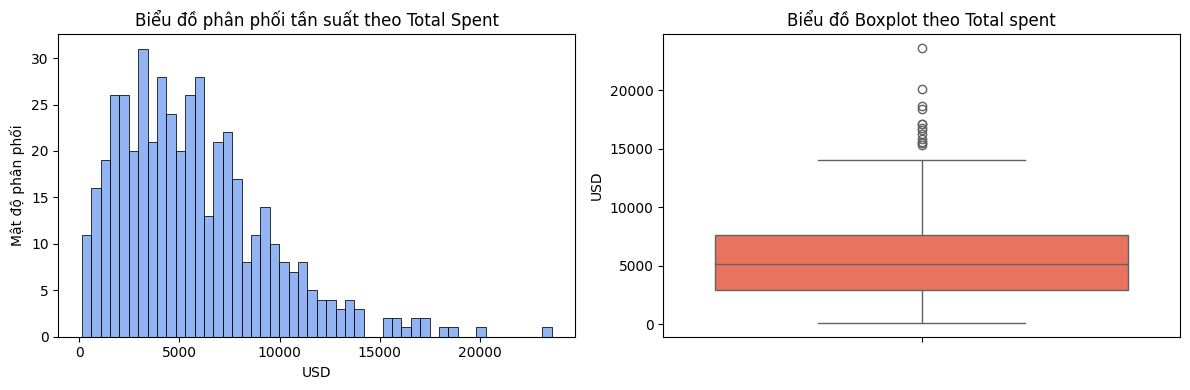

In [82]:
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data = customer_summary['total_spent'], bins = 50, alpha = 0.7, color = 'cornflowerblue')
plt.title('Biểu đồ phân phối tần suất theo Total Spent')
plt.xlabel('USD')
plt.ylabel('Mật độ phân phối')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data = customer_summary['total_spent'], color = 'tomato')
plt.title('Biểu đồ Boxplot theo Total spent')
plt.ylabel('USD')
plt.tight_layout()
plt.show()

Histogram:

- Phân phối lệch phải (right-skewed). Đa số khách hàng chi tiêu trong khoảng dưới 10000 USD, tập trung nhiều nhất trong khoảng 3000–8000 USD.
- Số lượng khách chi tiêu cao (>15000 USD) rất ít, cho thấy có một số ít khách hàng chi tiêu vượt trội so với phần lớn.

Boxplot:

- Median: Khoảng 5000 USD, thể hiện mức chi tiêu trung bình của khách hàng.
- Khoảng IQR: khá rộng, từ khoảng 3000 đến gần 8000 USD, thể hiện sự phân tán rõ rệt trong mức chi tiêu.
- Có một số khách hàng chi tiêu vượt xa nhóm còn lại (>15000 USD), thậm chí lên đến gần 24000 USD.

Night Days

In [83]:
customer_summary['avg_night_days'].describe()

count    471.000000
mean       7.476008
std        2.635857
min        1.000000
25%        5.700000
50%        7.600000
75%        9.000000
max       14.000000
Name: avg_night_days, dtype: float64

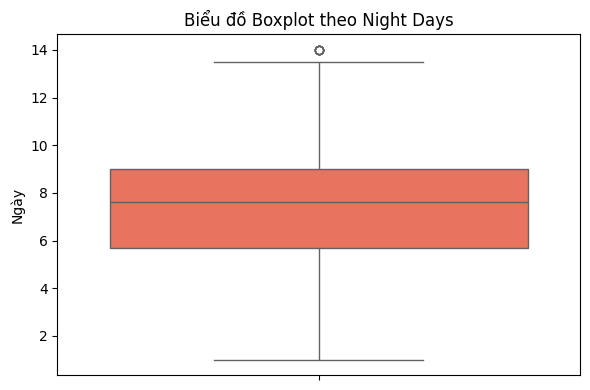

In [84]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = customer_summary['avg_night_days'], color = 'tomato')
plt.title('Biểu đồ Boxplot theo Night Days')
plt.ylabel('Ngày')
plt.tight_layout()
plt.show()

- Median: Thời gian lưu trú trung bình của khách hàng khoảng 8 đêm.
- IQR: Phần lớn khách hàng lưu trú từ 6 - 9 đêm.
- Số ít khách hàng lưu trú khá lâu lên tới khoảng 2 tuần.

Total Price Service

In [85]:
customer_summary['total_service'].describe()

count    471.000000
mean      18.004246
std       15.508679
min        0.000000
25%        6.000000
50%       14.000000
75%       26.000000
max       93.000000
Name: total_service, dtype: float64

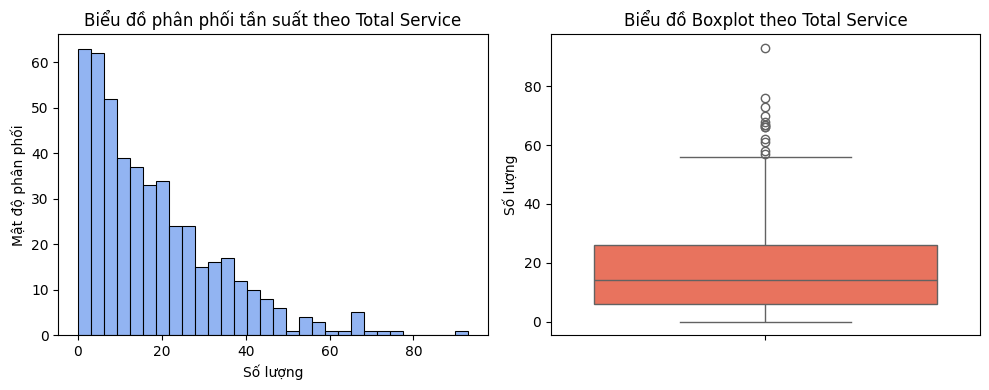

In [86]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data = customer_summary['total_service'], bins = 30, alpha = 0.7, color = 'cornflowerblue')
plt.title('Biểu đồ phân phối tần suất theo Total Service')
plt.xlabel('Số lượng')
plt.ylabel('Mật độ phân phối')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data = customer_summary['total_service'], color = 'tomato')
plt.title('Biểu đồ Boxplot theo Total Service')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

Histogram:

- Dạng phân phối lệch phải (right-skewed): Đa số khách hàng sử dụng dịch vụ ở mức thấp (dưới 20 lần).
- Tần suất cao nhất rơi vào khoảng 1–10 lần sử dụng, cho thấy hành vi sử dụng dịch vụ ở mức cơ bản là phổ biến.
- Một số ít khách hàng có tần suất sử dụng cao đột biến (trên 60–80 lần), cho thấy đây có thể là nhóm khách trung thành hoặc khách cao cấp.

Boxplot:

- Median: Trung vị rơi vào khoảng 15 lần.
- IQR: Phần lớn số lần sử dụng dịch vụ của khách hàng vào khoảng 6 đến 26 lần.
- Xuất hiện nhiều giá trị ngoại lai, thể hiện một nhóm khách có hành vi tiêu dùng vượt trội

# Phần 3: Mô hình hóa dữ liệu

##3.1 Chuẩn hóa dữ liệu

In [87]:
# Xóa cột customer_id
customer_summary.drop(columns = 'customer_id', inplace = True)

In [88]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [89]:
# Tách dữ liệu số và dữ liệu phân loại
num_cols = customer_summary.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = customer_summary.select_dtypes(include=['object']).columns.tolist()

# Chuẩn hóa dữ liệu số bằng MinMaxScaler
scaler = MinMaxScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(customer_summary[num_cols]), columns=num_cols)

# Mã hóa dữ liệu phân loại bằng One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output = False)
df_encoded_cat = pd.DataFrame(encoder.fit_transform(customer_summary[cat_cols]))

# Đặt lại tên cột cho dữ liệu mã hóa
encoded_cat_columns = encoder.get_feature_names_out(cat_cols)
df_encoded_cat.columns = encoded_cat_columns

# Kết hợp dữ liệu đã chuẩn hóa
df_processed = pd.concat([df_scaled_num, df_encoded_cat], axis=1)
df_processed.head()

,total_booking,avg_night_days,total_service,total_spent,most_room_type_used_Executive,most_room_type_used_Presidential,most_room_type_used_Standard,most_room_type_used_Suite,most_payment_method_used_Cash,most_payment_method_used_Credit Card,most_payment_method_used_Crypto,most_payment_method_used_PayPal,most_service_type_used_Fitness,most_service_type_used_Food&Beverage,most_service_type_used_No Service,most_service_type_used_Tours,most_service_type_used_Transportation,most_service_type_used_VIP Lounge
0,0.125,0.192308,0.053763,0.150974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.076923,0.064516,0.132774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250,0.561538,0.139785,0.150207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000,1.000000,0.043011,0.062998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.125,0.730769,0.032258,0.062018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##3.2 PCA

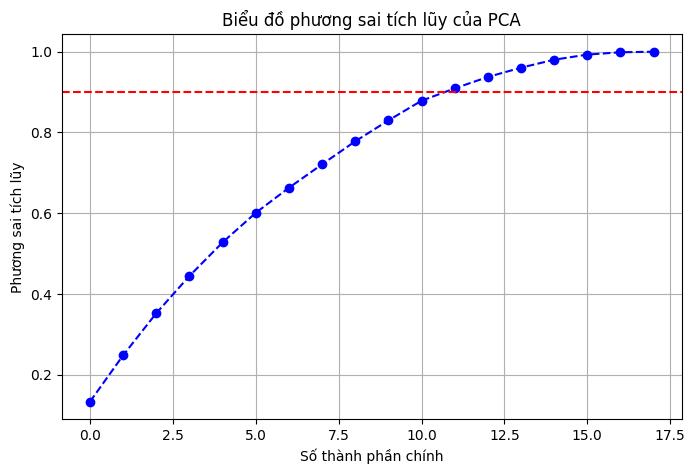

In [90]:
# Áp dụng PCA
pca = PCA()
pca.fit(df_processed)

# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(0.9, color='r', linestyle='--')
plt.xlabel('Số thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.title('Biểu đồ phương sai tích lũy của PCA')
plt.grid(True)
plt.show()

In [91]:
# Xác định số thành phần PCA giữ lại (>= 90% phương sai)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_pca_components = np.argmax(explained_variance >= 0.90) + 1

# Áp dụng PCA với số thành phần tối ưu
pca = PCA(n_components=optimal_pca_components)
df_pca = pca.fit_transform(df_processed)

# Kiểm tra kích thước dữ liệu sau PCA
df_pca.shape

(471, 12)

- Chọn số thành phần PCA: 12
- Dữ liệu sau khi giảm chiều: 471 dòng × 12 cột

##3.3 Đánh giá và chọn chỉ số cho mô hình

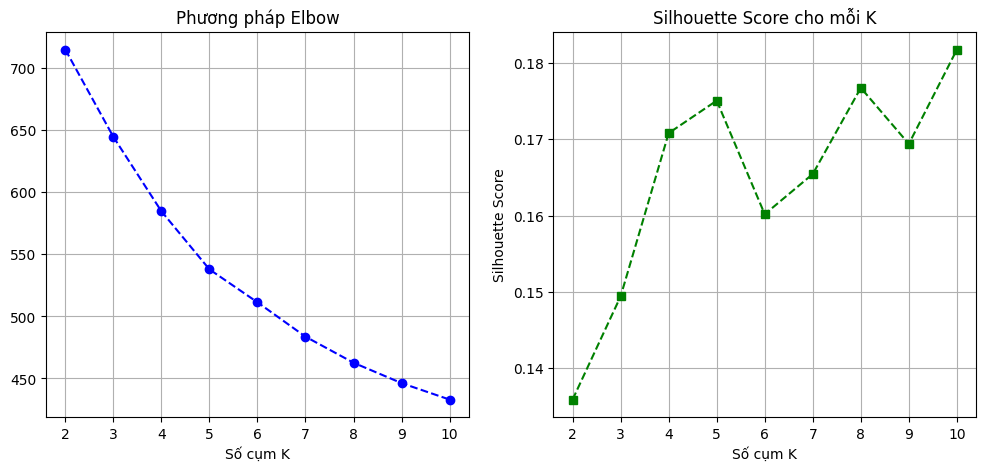

In [92]:
inertias = []
silhouette_scores = []
K = range(2, 11)  # Thử nghiệm từ 2 đến 10 cụm

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    
    # Tính WCSS (Within-Cluster Sum of Squares) cho Elbow method
    inertias.append(kmeans.inertia_)
    
    # Tính Silhouette Score
    silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Vẽ biểu đồ Elbow và Silhouette Score
plt.figure(figsize=(12, 5))

# Biểu đồ Elbow
ax1 = plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o', linestyle='--', color='b')
plt.xlabel('Số cụm K')
plt.ylabel('')
plt.title('Phương pháp Elbow')
plt.grid(True)

# Biểu đồ Silhouette Score
ax2 = plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', linestyle='--', color='g')
plt.xlabel('Số cụm K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score cho mỗi K')
plt.grid(True)

plt.show()


Biểu đồ Elbow:

- Biểu đồ cho thấy tổng sai số (inertia) giảm dần khi số cụm k tăng từ 2 → 10.
- "Điểm gấp khúc" (elbow) rõ ràng nhất xuất hiện tại k = 5, nơi tốc độ giảm của inertia bắt đầu chậm lại.
- Cho thấy k = 5 là số cụm tối ưu theo phương pháp Elbow, vì sau đó việc tăng K không mang lại cải thiện rõ rệt về độ chính xác.

Biểu đồ Silhouette Score:

- Silhouette Score tăng mạnh từ k = 2 đến k = 5 (cao nhất là ~0.175 tại k = 5), sau đó dao động nhẹ.
- Dù điểm cao nhất nằm ở k = 10 (~0.183), nhưng mức tăng so với k = 5 là không đáng kể, và có thể dẫn đến quá phân mảnh (over-segmentation).
- k = 5 tiếp tục là lựa chọn cân bằng giữa độ tách biệt và tính đơn giản của mô hình.

Nhận xét: Dựa vào kết quả trên K = 5 đạt hiệu quả tối ưu cho việc phân cụm

##3.4 Huấn luyện mô hình

In [93]:
# Tiến hành phân cụm với k = 5
kmeans = KMeans(n_clusters = 5, random_state=42, n_init=10)
customer_summary["Cluster"] = kmeans.fit_predict(df_pca)

##3.5 Trực quan hóa kết quả

In [94]:
print('Describe for Total Spent By Cluster:')
print('------------------------------------')
print(customer_summary.groupby('Cluster')['total_spent'].describe())

Describe for Total Spent By Cluster:
------------------------------------
         count         mean          std    min     25%     50%      75%      max
Cluster                                                                          
0        103.0  5530.203883  3481.192945  358.0  3105.0  4588.0  7608.00  17131.0
1         76.0  6174.302632  4307.484048  317.0  2597.5  5428.5  9003.75  20073.0
2         62.0  5550.241935  3631.040242  183.0  2451.5  5596.5  7575.50  18676.0
3        136.0  5647.433824  3717.816079  129.0  3039.0  5058.0  7572.25  23590.0
4         94.0  5806.861702  3714.926543  353.0  2922.5  5250.0  7514.75  18412.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\74098222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_summary, x = 'Cluster', y = 'total_spent', palette = 'Set2')


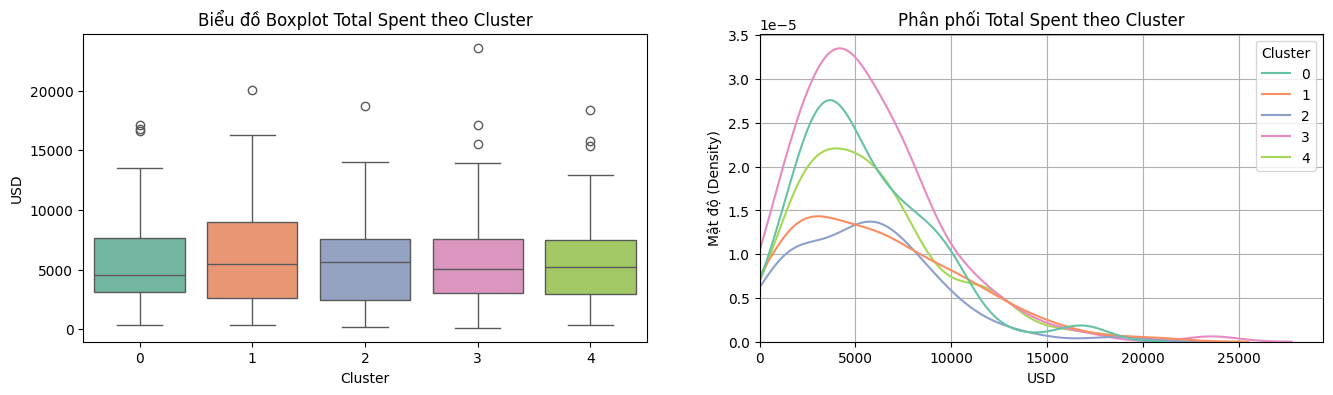

In [95]:
plt.figure(figsize = (16, 4))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data = customer_summary, x = 'Cluster', y = 'total_spent', palette = 'Set2')
plt.title('Biểu đồ Boxplot Total Spent theo Cluster')
plt.ylabel('USD')

ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(data=customer_summary, x='total_spent', hue='Cluster', palette= 'Set2')
plt.title('Phân phối Total Spent theo Cluster')
plt.xlabel('USD')
plt.xlim(0, )
plt.ylabel('Mật độ (Density)')
plt.grid(True)

plt.show()

In [96]:
print('Describe for AVG Night Days By Cluster:')
print('------------------------------------')
print(customer_summary.groupby('Cluster')['avg_night_days'].describe())

Describe for AVG Night Days By Cluster:
------------------------------------
         count      mean       std  min    25%   50%   75%   max
Cluster                                                         
0        103.0  7.099029  2.576572  2.0  5.300  7.30  9.00  13.0
1         76.0  7.707895  2.294385  3.0  5.950  7.85  9.35  13.0
2         62.0  7.808065  3.024452  1.0  6.300  8.00  9.20  14.0
3        136.0  7.167647  2.581928  1.0  5.750  7.20  8.70  14.0
4         94.0  7.928723  2.699607  1.5  6.525  7.80  9.80  14.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\901172295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_summary, x = 'Cluster', y = 'avg_night_days', palette = 'Set2')


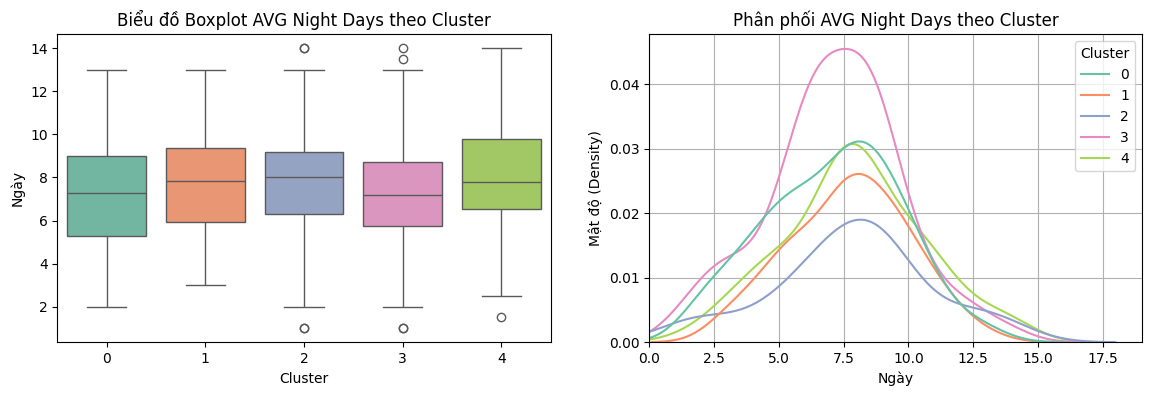

In [97]:
plt.figure(figsize = (14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data = customer_summary, x = 'Cluster', y = 'avg_night_days', palette = 'Set2')
plt.title('Biểu đồ Boxplot AVG Night Days theo Cluster')
plt.ylabel('Ngày')

ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(data=customer_summary, x='avg_night_days', hue='Cluster', palette= 'Set2')
plt.title('Phân phối AVG Night Days theo Cluster')
plt.xlabel('Ngày')
plt.xlim(0, )
plt.ylabel('Mật độ (Density)')
plt.grid(True)

plt.show()

In [98]:
print('Describe for Total Service By Cluster:')
print('------------------------------------')
print(customer_summary.groupby('Cluster')['total_service'].describe())

Describe for Total Service By Cluster:
------------------------------------
         count       mean        std  min   25%   50%    75%   max
Cluster                                                           
0        103.0  17.582524  14.380354  0.0  5.50  15.0  26.00  67.0
1         76.0  20.236842  18.297445  1.0  6.00  12.0  27.00  76.0
2         62.0  16.741935  14.637629  0.0  4.00  14.0  26.25  54.0
3        136.0  17.360294  15.063162  0.0  7.00  13.5  24.25  93.0
4         94.0  18.425532  15.578790  0.0  6.25  15.5  24.75  68.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3628697722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_summary, x = 'Cluster', y = 'total_service', palette = 'Set2')


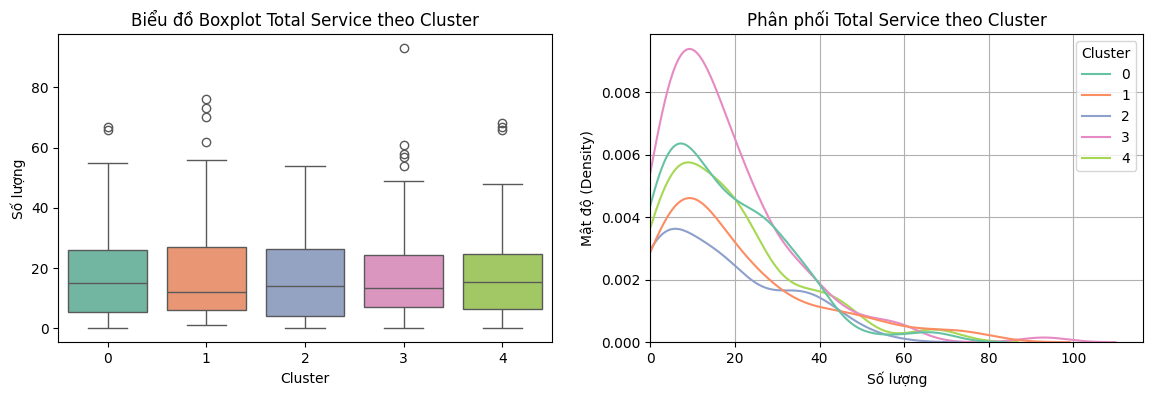

In [99]:
plt.figure(figsize = (14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data = customer_summary, x = 'Cluster', y = 'total_service', palette = 'Set2')
plt.title('Biểu đồ Boxplot Total Service theo Cluster')
plt.ylabel('Số lượng')

ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(data=customer_summary, x='total_service', hue='Cluster', palette= 'Set2')
plt.title('Phân phối Total Service theo Cluster')
plt.xlabel('Số lượng')
plt.xlim(0, )
plt.ylabel('Mật độ (Density)')
plt.grid(True)

plt.show()

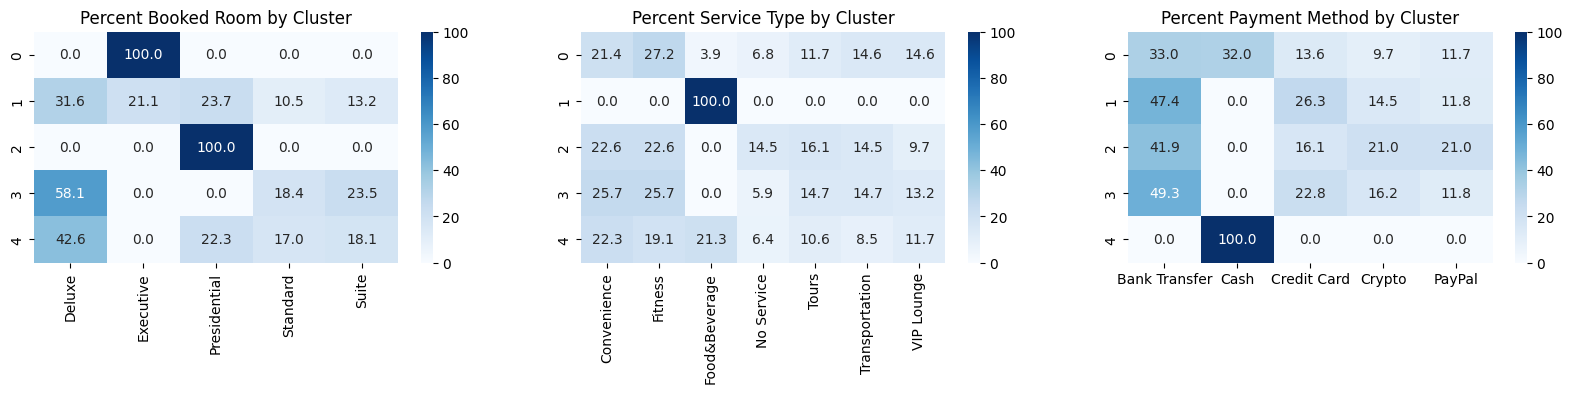

In [100]:
# room type theo cluster
room_type = customer_summary.groupby("Cluster")["most_room_type_used"].value_counts().unstack()
room_type.fillna(0,inplace=True)
room_percent = room_type.div(room_type.sum(axis=1), axis=0) * 100

plt.figure(figsize=(20, 3))
ax1 = plt.subplot(1, 3, 1)
sns.heatmap(room_percent, annot=True, cmap="Blues", fmt=".1f")
plt.title("Percent Booked Room by Cluster")
plt.xlabel("")
plt.ylabel("")

# service type theo cluster
service_type = customer_summary.groupby("Cluster")["most_service_type_used"].value_counts().unstack()
service_type.fillna(0,inplace=True)
service_per = service_type.div(service_type.sum(axis=1), axis=0) * 100

ax2 = plt.subplot(1, 3, 2)
sns.heatmap(service_per, annot=True, cmap="Blues", fmt=".1f")
plt.title("Percent Service Type by Cluster")
plt.xlabel("")
plt.ylabel("")

# payment method theo cluster
payment_method = customer_summary.groupby("Cluster")["most_payment_method_used"].value_counts().unstack()
payment_method.fillna(0,inplace=True)
payment_method_per = payment_method.div(payment_method.sum(axis=1), axis=0) * 100

ax3 = plt.subplot(1, 3, 3)
sns.heatmap(payment_method_per, annot=True, cmap="Blues", fmt=".1f")
plt.title("Percent Payment Method by Cluster")
plt.xlabel("")
plt.ylabel("")

plt.show()

##3.6 Phân tích đặc điểm từng nhóm

Nhóm 0

- Chiếm khoảng 22%.
- Chi tiêu ở mức trung bình.
- 100% sử dụng phòng Executive – tiêu chuẩn dành cho khách công vụ, sự kiện.
- Mức sử dụng dịch vụ hợp lí --> Nhóm khách này chủ yếu tham gia sự kiện nên ít phát sinh thêm nhu cầu cá nhân.
- Thời gian lưu trú không quá dài cũng không quá ngắn. --> Phù hợp với các sự kiện, hội nghị kéo dài vài ngày.
- Dịch vụ sử dụng đa dạng: Fitness (27.2%), Convenience (21.4%), VIP Lounge và Transportation (14.6%).
- Thanh toán chủ yếu qua Bank Transfer (33%) và Cash (32%).

-> Nhóm này đại diện cho doanh nghiệp chủ yếu tập trung vào các sự kiện, hội nghị ít tiêu dùng thêm.

Nhóm 1

- Chiếm khoảng 16%.
- Nhóm này có chi tiêu trung bình cao nhất và độ phân tán lớn nhất trong các nhóm --> Đây là nhóm chi tiêu khá mát tay.
- Phòng đa dạng: Deluxe (31.6%), Executive (21.1%), Presidential (23.7%), có cả Suite.
- Thời gian lưu trú và dịch vụ dùng trung bình. Không quá dài nhưng chi đậm.
- 100% sử dụng dịch vụ Food & Beverage --> Tập trung mạnh vào các dịch vụ về ăn uống.
- Thanh toán đa dạng và hiện đại: Bank Transfer (47.4%), Credit Card (26.3%), Crypto (14.5%), PayPal (11.8%).

-> Nhóm này là nhóm khách cao cấp hoặc giới doanh nhân, có nền tảng tài chính ổn định và dồi dào, tập trung trải nghiệm ăn uống.

Nhóm 2

- Chiếm khoảng 13%.
- Chi tiêu trung bình.
- 100% sử dụng phòng Presidential.
- Thời gian lưu trú không quá lâu. Mức sử dụng dịch vụ thấp
- Sử dụng VIP Lounge (9.7%), Tours, Fitness đều ở mức ~15–22%.
- Thanh toán hiện đại: chủ yếu là Bank Transfer (41.9%). Credit, Crypto và PayPal cũng chiếm số ít.

-> Đây là nhóm khách VIP chỉ đặt phòng Presidential để tận hưởng không gian sang trọng nhất. Họ chi tiêu cao nhưng ít sử dụng dịch vụ, chủ yếu ưu tiên sự tiện nghi và riêng tư.

Nhóm 3

- Đây là nhóm khách hàng phổ biến nhất của khách sạn chiếm tới khoảng 29%.
- Chi tiêu khá cao nhưng có không ít khách hàng chi tiêu khá cao lên tới 23590 --> Có khách đoàn/gia đình.
- Sử dụng phòng Deluxe (58.1%), còn lại là Standard, Suite. --> Ưu tiên phòng tầm trung đến cao cấp.
- Mức sử dụng dịch vụ cao nhất trong các nhóm và thời gian lưu trú trung bình nhưng ổn định.
- Dịch vụ tiện ích và sức khỏe khá phổ biến, có như cầu về du lịch và các hoạt động di chuyển. --> Nhóm khách du lịch hoặc khách đoàn.
- Thanh toán đa dạng chủ yếu là Bank Transfer (49.3%).

-> Đây là nhóm khách du lịch trung thành với khách sạn.

Nhóm 4

- Chiếm khoảng 20%.
- Chi tiêu thấp nhưng thời gian lưu trú lâu nhất trong các nhóm.
- Phòng phổ biến: Deluxe (42.6%), Presidential (22.3%), Suite (18.1%).
- Dùng dịch vụ ở mức thấp.
- Chủ yếu là các dịch vụ tiện ích cũng như ăn uống.
- Thanh toán 100% bằng tiền mặt. --> Cho thấy tính ưu tiên sự nhanh chóng, tiện lợi.

-> Đây là nhóm khách hàng chi tiêu tiết kiệm có kế hoạch, họ lưu trú khá lâu, ưu tiên chất lượng phòng ở hơn là trải nghiệm dịch vụ. 

# Phần 4: Kết luận

##4.1 Tóm tắt phát hiện

Dựa vào thuật toán phân cụm Kmeans ta đã chia khách hàng của khách sạn làm 5 nhóm chính:

1. Nhóm khách hàng chuyên tổ chức sự kiện (22%)
2. Nhóm thực khách cao cấp (16%)
3. Nhóm khách hàng VIP (13%)
4. Nhóm khách hàng phổ thông (29%)
5. Nhóm khách hàng tiết kiệm (20%)

##4.2 Đề xuất chiến lược

### Nhóm khách hàng tổ chức sự kiện

1. Gói dịch vụ Executive với giá trị gia tăng
- Tạo gói phòng Executive bao gồm ưu tiên đặt trước VIP Lounge và dịch vụ dọn phòng miễn phí.
2. Chính sách giá linh hoạt:
- Áp dụng giảm giá 25% cho đặt phòng trước 7 ngày và tặng 1 đêm miễn phí nếu ở từ 3 đêm.
3. Triển khai các gói thư giãn sau buổi họp hay hội nghị:
- Gói Spa thiết kế riêng cho khách hội nghị với thời lượng ngắn (30-60 phút).
4. Nâng cấp tiện ích:
- Cải tạo phòng VIP Lounge thêm các khu vực yên tĩnh để đọc sách cũng như làm việc.
- Nâng cấp phòng Gym với thiết bị hiện đại, cung cấp thêm các khóa tập cá nhân hóa.

### Thực khách cao cấp

1. Chương trình khách hàng thân thiết:
- Cấp bậc: Bạc chi tiêu từ 3000 USD/năm (giảm 10%), Vàng chi tiêu từ 8000 USD/năm (giảm 15%), Bạch kim chi tiêu từ 12000 USD/năm (giảm 20%).
- Hệ thống đổi thưởng: 1 điểm cho mỗi 10 USD chi tiêu, đổi 50 điểm (500 USD chi tiêu) lấy món ăn miễn phí (giá trị 80-100 USD tùy thực đơn).
2. Tổ chức sự kiện ẩm thực:
- Bữa tối chủ đề hàng tuần (ví dụ: ẩm thực Pháp, Ý,...).
3. Tối ưu thanh toán:
- Tặng voucher ăn uống khi thanh toán bằng Bank Transfer.
4. Chiến dịch marketing:
- Quảng bá trên Tiktok và Facebook với video hậu trường chế biến món ăn.
- Hợp tác với các đầu bếp nổi tiếng trải nghiệm dịch vụ cũng như chất lượng ẩm thực của khách sạn.

### Nhóm khách hàng VIP

1. Nâng cao trải nghiệm phòng Presidential:
- Tiện ích độc quyền: Cung cấp các dịch vụ chỉ dành cho khách Presidential như khu check in/check out riêng, dịch vụ đưa đón độc quyền.
- Trang trí phòng theo sở thích: cho phép khách trang trí phòng theo sở thích như chọn loại giường, sản phẩm phòng tắm cao cấp.
2. Tăng cường sự riêng tư và tiện nghi:
- Dịch vụ ăn uống tại phòng 24/7 với thực đơn, chế độ ăn đa dạng.
- Cung cấp các dịch vụ Fitness như Spa, Yoga tại phòng
3. Đào tạo nhân viên về dịch vụ cao cấp:
- Tổ chức các khóa đào tạo chuyên sâu về kỹ năng phục vụ khách VIP, tập trung sự riêng tư, dự đoán nhu cầu và sự am hiểu văn hóa đa quốc gia. 

### Nhóm khách hàng phổ thông

1. Gói cho khách đoàn/gia đình:
- Thiết kế combo theo nhóm bao gồm phòng + ăn sáng + dịch vụ đưa đón.
- Giảm giá theo số lượng người hoặc thời gian lưu trú dài ngày.
2. Phát triển chương trình khách hàng trung thành:
- Cấp bậc: Bạc >= 6000 USD/năm (giảm 8% giá phòng và dịch vụ), Vàng >= 9000 USD/năm (giảm 12%, tặng buổi sáng miễn phí mỗi ngày), Bạch kim >= 13000 USD/năm (giảm 18%, nâng hạng phòng miễn phí, ưu tiên đặt trước ngày lễ).
3. Nâng cấp tiện ích:
- Đầu tư vào các dịch vụ nhóm khách này thường dùng: dịch vụ sức khỏe (Spa, Gym), tiện ích như dọn phòng và giặc là, tour du lịch tại địa phương.


### Nhóm khách hàng tiết kiệm

1. Ưu đãi theo thời gian lưu trú:
- Từ 3 đêm: Miễn phí buổi sáng.
- Từ 5 đêm: Giảm 10% tổng hóa đơn lưu trú, tặng voucher giảm 20% cho 1 trong các loại dịch vụ như Convenience, Fitness và F&B .
- Từ 7 đêm: Giảm 15%, tặng 1 gói trải nghiệm cao cấp: 30 phút Spa, 1 món signature tại nhà hàng.
2. Tối ưu hóa trải nghiệm:
- Ưu đãi cho khách khi thanh toán tại chỗ (giảm 10% khi thanh toán toàn bộ bằng tiền mặt).